# <Strong> TASK-3 POLYNOMIAL REGRESSION MODEL (QUADRATIC)
This file contains task-3 operations performed by using Polynomial Regression model(total_sales_price) as mentioned in the questions.

## <Strong> 1. Importing necessary Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/CSV /Diamond/diamonds.csv")

## <Strong> 2. Data Preprocessing and Data Transformation

### <Strong> Description

In [ ]:
dataset.head(3)

In [ ]:
dataset.describe()

In [ ]:
dataset.info()

In [ ]:
dataset.shape

In [ ]:
dataset.columns

### <Strong>Finding How much Unknown Data

In [ ]:
# Dropping first column from dataframe
dataset.drop(dataset.columns[[0]], axis=1, inplace=True)

In [ ]:
dataset.isnull().sum()

In [ ]:
# 1. cut
cut_values = dataset['cut'].value_counts()
cut_values

In [ ]:
# 2. COLOR
color_values = dataset['color'].value_counts()
color_values

In [ ]:
# 3.CLARITY
clarity_values = dataset['clarity'].value_counts()
clarity_values

In [ ]:
#4. CARAT WEIGHT
carat_weight_values = dataset['carat_weight'].value_counts()
carat_weight_values

In [ ]:
# 5. CUT QUALITY
cut_quality_values = dataset['cut_quality'].value_counts()
cut_quality_values

In [ ]:
# 6. LAB
lab_values = dataset['lab'].value_counts()
lab_values

In [ ]:
# 7. SYMMETRY
symmetry_values = dataset['symmetry'].value_counts()
symmetry_values

In [ ]:
# 8. POLISH
polish_values = dataset['polish'].value_counts()
polish_values

In [ ]:
# 9. EYE CLEAN (Remove this because 71.42% unknown values)
eye_clean_values = dataset['eye_clean'].value_counts()
print(eye_clean_values)
piec_colors = sns.color_palette('pastel')[0:len(eye_clean_values)]
eye_clean_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

In [ ]:
# 10. CULET SIZE (39.03% unknown) (handle unknowns with mode)
culet_size_values = dataset['culet_size'].value_counts()
print(culet_size_values)
piec_colors = sns.color_palette('pastel')[0:len(culet_size_values)]
culet_size_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

In [ ]:
# 11. CULET CONDITION (Remove this because 93.03% unknown values)
culet_condition_values = dataset['culet_condition'].value_counts()
culet_condition_values
piec_colors = sns.color_palette('pastel')[0:len(culet_condition_values)]
culet_condition_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

In [ ]:
#12. DEPTH PERCENT
depth_percent_values = dataset['depth_percent'].value_counts()
depth_percent_values

In [ ]:
#13. TABLE PERCENT
table_percent_values = dataset['table_percent'].value_counts()
table_percent_values

In [ ]:
#14. MEAS LENGTH
meas_length_values = dataset['meas_length'].value_counts()
meas_length_values

In [ ]:
#15. MEAS WIDTH
meas_width_values = dataset['meas_width'].value_counts()
meas_width_values

In [ ]:
#16. MEAS DEPTH
meas_depth_values = dataset['meas_depth'].value_counts()
meas_depth_values

In [ ]:
# 17. GIRDLE MIN (37.97% unknown need to handle)
girdle_min_values = dataset['girdle_min'].value_counts()
print(girdle_min_values)
piec_colors = sns.color_palette('pastel')[0:len(girdle_min_values)]
girdle_min_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

In [ ]:
# 18. GIRDLE MAX (38.37% unknown need to handle)
girdle_max_values = dataset['girdle_max'].value_counts()
print(girdle_max_values)
piec_colors = sns.color_palette('pastel')[0:len(girdle_max_values)]
girdle_max_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

In [ ]:
#19. FLOUR COLOR (Remove this because 92.84% unknown values)
fluor_color_values = dataset['fluor_color'].value_counts()
print(fluor_color_values)
piec_colors = sns.color_palette('pastel')[0:len(fluor_color_values)]
fluor_color_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

In [ ]:
#20. FLOUR INTENSITY (Remove this because 65.31% unknown values)
fluor_intensity_values = dataset['fluor_intensity'].value_counts()
print(fluor_intensity_values)
piec_colors = sns.color_palette('pastel')[0:len(fluor_intensity_values)]
fluor_intensity_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

In [ ]:
#21. FANCY COLOR DOMINANT COLOR (Remove this because 95.83% unknown values)
fancy_color_dominant_color_values = dataset['fancy_color_dominant_color'].value_counts()
print(fancy_color_dominant_color_values)
piec_colors = sns.color_palette('pastel')[0:len(fancy_color_dominant_color_values)]
fancy_color_dominant_color_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

In [ ]:
#22. FANCY COLOR SECONDARY COLOR (Remove this because 99.52% unknown values)
fancy_color_secondary_color_values = dataset['fancy_color_secondary_color'].value_counts()
print(fancy_color_secondary_color_values)
piec_colors = sns.color_palette('pastel')[0:len(fancy_color_secondary_color_values)]
fancy_color_secondary_color_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

In [ ]:
#23.  FANCY COLOR OVERTONE (Remove this because 99.07% unknown values)
fancy_color_overtone_values = dataset['fancy_color_overtone'].value_counts()
print(fancy_color_overtone_values)
piec_colors = sns.color_palette('pastel')[0:len(fancy_color_overtone_values)]
fancy_color_overtone_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

In [ ]:
#24. FANCY COLOR INTENSITY (Remove this because 95.83% unknown values)
fancy_color_intensity_values = dataset['fancy_color_intensity'].value_counts()
print(fancy_color_intensity_values)
piec_colors = sns.color_palette('pastel')[0:len(fancy_color_intensity_values)]
fancy_color_intensity_values.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

Here , we dropping columns which have more tha 65% unknown values.
1.   eye_clean (71.42%)
2.   culet_condition (93.3%)
3.   flour color (92.84%)
4. flour_intensity (65.31%)
5. fancy_color_dominant_color (95.83%)
6. fancy_color_secondary_color (99.52%)
7. fancy_color_overtone ( 99.07%)
8. fancy_color_intensity (95.83%)





In [ ]:
#Drooping columns from dataframe
dropped_features = ['eye_clean', 'culet_condition' , 'fluor_color' , 'fluor_intensity' , 'fancy_color_dominant_color', 'fancy_color_secondary_color' , 'fancy_color_overtone' , 'fancy_color_intensity', 'girdle_min' , 'girdle_max' ]
dataset.drop(columns=dropped_features, inplace=True)


In [ ]:
dataset.head(5)

In [ ]:
# remaining columns after dropping
dataset.info()

### <strong>Handling Unknown Data


In [ ]:
#Finding MODE (color, cut_quality, culet_size)

#1. color
color_mode = dataset['color'].mode().values[0]
print("Mode Value of Color : ",color_mode)

#2. cut_quality
cut_quality_mode =  dataset['cut_quality'].mode().values[0]
print("Mode Value of Cut quality: " , cut_quality_mode)

#3. culet_size
culet_size_mode = dataset['culet_size'].mode().values[0]
print("Mode Value of culet size ", culet_size_mode)



In [ ]:
# Replacing unkonown values with MODE (color, cut_quality, culet_size)

# 1. replacing unknown in color (E)
dataset.loc[dataset['color']== 'unknown', "color"] = color_mode
color_values = dataset['color'].value_counts()
print(color_values)
print("--------------------------------------------------")

# 2. replacing unknown in cut_quality (Excellent)
dataset.loc[dataset['cut_quality']== 'unknown', "cut_quality"] = cut_quality_mode
cut_quality_values = dataset['cut_quality'].value_counts()
print(cut_quality_values)
print("--------------------------------------------------")

#3. replacing unknown in culet_size (N)
dataset.loc[dataset['culet_size']== 'unknown', "culet_size"] = culet_size_mode
culet_size_values = dataset['culet_size'].value_counts()
print(culet_size_values)

### <strong>Label Encoding

In [ ]:
dataset.shape

In [ ]:
dataset.head(10)

In [ ]:
#Label encoding for  column (cut , color , clarity , cut_quality , lab , symmetry , polish , culet_size)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset['cut'] =label_encoder.fit_transform(dataset['cut'])
dataset['color'] =label_encoder.fit_transform(dataset['color'])
dataset['clarity'] =label_encoder.fit_transform(dataset['clarity'])
dataset['cut_quality'] =label_encoder.fit_transform(dataset['cut_quality'])
dataset['lab'] =label_encoder.fit_transform(dataset['lab'])
dataset['symmetry'] =label_encoder.fit_transform(dataset['symmetry'])
dataset['polish'] =label_encoder.fit_transform(dataset['polish'])
dataset['culet_size'] =label_encoder.fit_transform(dataset['culet_size'])
dataset.head(5)

In [ ]:
# selected_features = ['carat_weight' , 'depth_percent' , 'table_percent' , 'meas_length' , 'meas_width' , 'meas_depth']
# target_variable = "total_sales_price"

# sns.set(style="ticks")
# sns.pairplot(dataset, hue=target_variable, vars=selected_features, diag_kind="kde")
# plt.show()

### <strong>Correlation Matrix

In [ ]:
# Finding Correlation
correlation_matrix = dataset.corr()
correlation_matrix

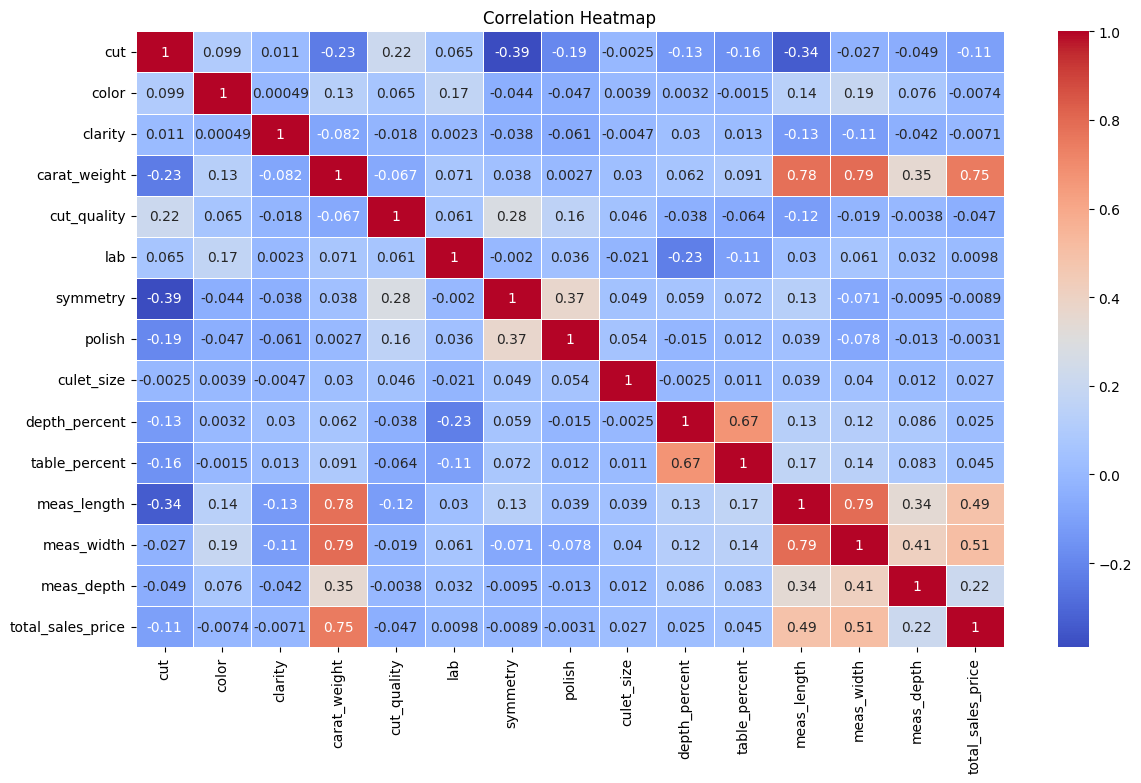

In [ ]:
# ploting correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
dataset.shape

(219703, 15)

In [ ]:
features = dataset.iloc[:,:-1]
target = dataset.iloc[:,14]

In [ ]:
features.head(3)

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth
0,10,1,10,0.09,0,2,4,4,3,62.7,59.0,2.85,2.87,1.79
1,10,1,10,0.09,4,2,4,4,3,61.9,59.0,2.84,2.89,1.78
2,10,1,10,0.09,0,2,4,4,3,61.1,59.0,2.88,2.90,1.77


In [ ]:
target.head(3)

0    200
1    200
2    200
Name: total_sales_price, dtype: int64

## <Strong>3.Finding Best Polynomial model based on Degree and Model Evaluation


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)


In [ ]:
#feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
degrees = [1, 2, 3,]
rmse_scores = []

for degree in degrees:
    # Transform features to include polynomial terms up to 'degree'
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train_scaled)
    X_test_poly = poly_features.transform(X_test_scaled)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_poly)

    # Calculate RMSE on the test set
    mse = mean_squared_error(y_test, y_pred , squared=False)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Calculate R-squared (R2) on the test set
    score = r2_score(y_test,y_pred)

    print(f"RMSE of degree {degree} :", rmse)
    print(f"R2 Score of degree {degree} :", score)
    print("______________________________________")

RMSE of degree 1 : 129.7632632170579
R2 Score of degree 1 : 0.6155485169190442
______________________________________
RMSE of degree 2 : 125.44807944015601
R2 Score of degree 2 : 0.664192358708136
______________________________________
RMSE of degree 3 : 219.3090869096025
R2 Score of degree 3 : -2.136613547052282
______________________________________


## <Strong> 4. Hyperparameter Tuning and Model Evaluation




In [ ]:

ridge = Ridge()
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10,100],    # Regularization strength for Ridge regression
    'fit_intercept': [True, False],            # Whether to fit the intercept
}


# Create a GridSearchCV object
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = Ridge(**best_params)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
best_model.fit(X_train_poly, y_train)




Ridge(alpha=10, fit_intercept=False)

In [ ]:
y_pred = best_model.predict(X_test_poly)
rmse = np.sqrt(mean_squared_error(y_test, y_pred , squared = False))
score = r2_score(y_test,y_pred)
print("Best Hyperparameters:")
print(best_params)
print(f'After hyperparameter tuning , RMSE on Test Set: {rmse:.2f}')
print(f"\After hyperparameter tuning , R2 Score of degree 2 :", score)

Best Hyperparameters:
{'alpha': 10, 'fit_intercept': False}
After hyperparameter tuning , RMSE on Test Set: 125.55
\After hyperparameter tuning , R2 Score of degree 2 : 0.663065310384479
